In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-1pzi0omz because the default path (/home/ubuntu/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [71]:
with open('data/5min/train.pickle', 'rb') as handle:
    train = pickle.load(handle)
with open('data/5min/test.pickle', 'rb') as handle:
    test = pickle.load(handle)
X_train = np.array(train['X'])
y_train = np.array(train['y'])
X_test = np.array(test['X'])
y_test = np.array(test['y'])
label = train['feature_name']
label = [x.replace('_', '') for x in label]
uid = np.array(train['uid']).astype(np.int32)

In [72]:
pos_indices = np.where(y_train==1)
neg_indices = np.where(y_train==0)

In [73]:
pos_mean = X_train[pos_indices].mean(axis=0)
neg_mean = X_train[neg_indices].mean(axis=0)

In [74]:
u, c = np.unique(uid, return_counts=True)
dup = u[c > 1]

In [77]:
X_train.shape

115

In [75]:
dup

array([2058], dtype=int32)

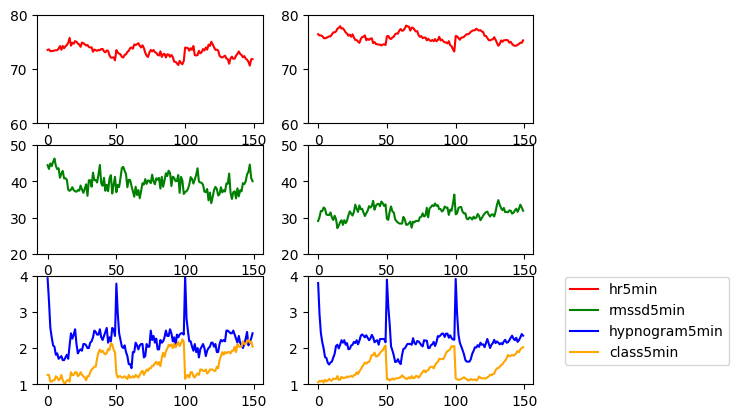

In [44]:
f, ax = plt.subplots(3, 2)

line1, = ax[0,0].plot(pos_mean[0], c='r')
ax[0,1].plot(neg_mean[0], c='r')
line2, = ax[1,0].plot(pos_mean[1], c='g')
ax[1,1].plot(neg_mean[1], c='g')
ax[0,0].set_ylim([60, 80])
ax[0,1].set_ylim([60, 80])
ax[1,0].set_ylim([20, 50])
ax[1,1].set_ylim([20, 50])
line3, = ax[2,0].plot(pos_mean[2], c='blue')
ax[2,1].plot(neg_mean[2], c='blue')
line4, = ax[2,0].plot(pos_mean[3], c='orange')
ax[2,1].plot(neg_mean[3], c='orange')
ax[2,0].set_ylim([1, 4])
ax[2,1].set_ylim([1, 4])
plt.legend([line1, line2, line3, line4], label, bbox_to_anchor=(1.9, 1.05))
plt.show()

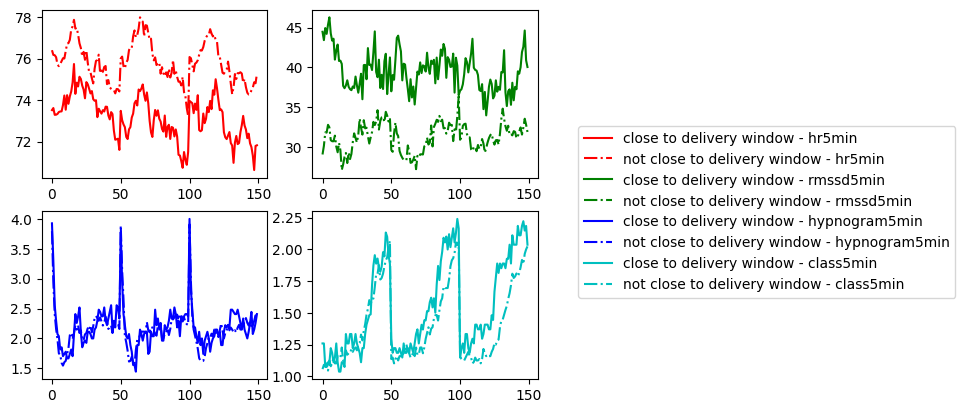

In [65]:
f, ax = plt.subplots(2, 2)
legend_labels = []
for i in range(len(label)):
    legend_labels.append(f'close to delivery window - {label[i]}')
    legend_labels.append(f'not close to delivery window - {label[i]}')
pos1, = ax[0][0].plot(pos_mean[0], 'r')
neg1, = ax[0][0].plot(neg_mean[0], 'r-.')
pos2, = ax[0][1].plot(pos_mean[1], 'g')
neg2, = ax[0][1].plot(neg_mean[1], 'g-.')
pos3, = ax[1][0].plot(pos_mean[2], 'b')
neg3, = ax[1][0].plot(neg_mean[2], 'b-.')
pos4, = ax[1][1].plot(pos_mean[3], 'c')
neg4, = ax[1][1].plot(neg_mean[3], 'c-.')

plt.legend([pos1, neg1, pos2, neg2, pos3, neg3, pos4, neg4], legend_labels, bbox_to_anchor=(1.15, 1.55))
plt.show()

2
3


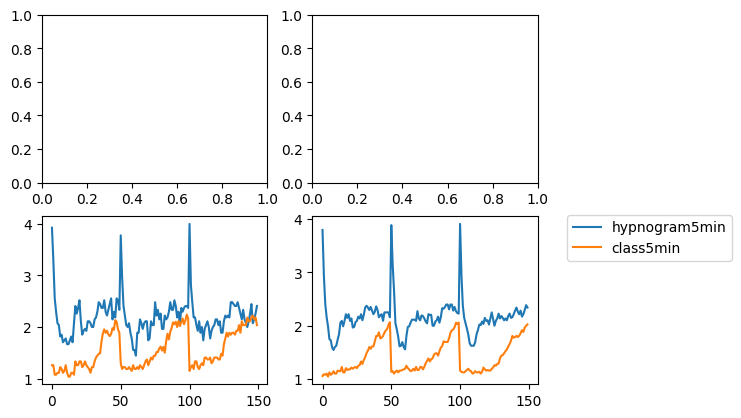

In [18]:
f, ax = plt.subplots(2, 2)
# for i in range(pos_mean.shape[0]-2):
#     ax[0,0].plot(pos_mean[i], label=label[i])
#     ax[0,1].plot(neg_mean[i], label=label[i])
# plt.legend(bbox_to_anchor=(1.1, 1.05))

for i in range(pos_mean.shape[0]-2, pos_mean.shape[0]):
    print(i)
    ax[1,0].plot(pos_mean[i], label=label[i])
    ax[1,1].plot(neg_mean[i], label=label[i])
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [58]:
line1, = ax.plot([1, 2, 3], label='label1')
line2, = ax.plot([1, 2, 3], label='label2')
ax.legend(handles=[line1, line2])

AttributeError: 'numpy.ndarray' object has no attribute 'plot'